# Optimizer

## Initialize the dataset

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import tqdm

def load_mnist_data(root_path='./data', batch_size=4):
    transform = transforms.Compose(
        [transforms.ToTensor(),
        transforms.Normalize((0.5), (0.5))]
    )

    trainset = torchvision.datasets.MNIST(root=root_path, train=True, download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

    testset = torchvision.datasets.MNIST(root=root_path, train=False, download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

    return trainloader, testloader

## Define the neural network structure

In [2]:
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(784, 32),  # input layer (do not change the in_features size of this layer - we need it later)
    nn.ReLU(),
    nn.Linear(32, 32),
    nn.ReLU(),
    nn.Linear(32, 32),
    nn.ReLU(),
    # your layers
    nn.Linear(32, 10)  # you can change the in_features of this layer but let the out_features at size 10 here - we need it layer
)

## Training loop

In [3]:
from typing import Callable
from torch.optim import Optimizer

def train_model(
    model: nn.Module, loss_fn: Callable, optimizer: Optimizer,
    batch_size: int = 32, epochs: int = 10
):
    # we only consider the mnist train data for this example
    train_loader, _ = load_mnist_data(batch_size=batch_size)
    errorAvg = []
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    criterion = loss_fn.to(device)
    model = model.to(device)
    for epoch in range(epochs):
       
        running_loss = 0.0
        running_accuracy = []
        iterVal=0
        accumulatedLoss = 0


        for imgs, targets in tqdm.tqdm(train_loader, desc=f'Training iteration {epoch + 1}'):
            imgs, targets = imgs.to(device), targets.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(imgs.reshape(imgs.shape[0], -1)).to(device)
            loss = criterion(outputs, targets).to(device)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            accumulatedLoss += loss.item()
            iterVal += 1
            # Calculate the Accuracy (how many of all samples are correctly classified?)
            max_outputs = torch.max(outputs, dim=1).indices
            accuracy = (max_outputs.detach() == targets.detach()).to(dtype=torch.float32).mean()
            running_accuracy.append(accuracy)

            if iterVal % 50 == 0 : 
                
                errorAvg.append(accumulatedLoss/50)
                accumulatedLoss = 0


        print(f'Epoch {epoch + 1} finished with loss: {running_loss / len(train_loader):.3f} and accuracy {torch.tensor(running_accuracy).mean():.3f}')

    return errorAvg

## Define the optimizers

In [4]:
from torch.optim import SGD, Adagrad, RMSprop, Adam
import copy
optimModel = { 'SGD':copy.deepcopy(model).to('cuda'), 'Adagrad':copy.deepcopy(model).to('cuda'), 'RMSprop':copy.deepcopy(model).to('cuda'), 'Adam':copy.deepcopy(model).to('cuda')}
optimErr = { 'SGD':[], 'Adagrad':[], 'RMSprop':[], 'Adam':[]}
optimizers= { 'SGD':SGD(optimModel['SGD'].parameters(), lr=0.001), 
'Adagrad':Adagrad(optimModel['Adagrad'].parameters(), lr=0.001), 
'RMSprop':RMSprop(optimModel['RMSprop'].parameters(), lr=0.001), 
'Adam':Adam(optimModel['Adam'].parameters(), lr=0.001)}



## Run the training loop with different optimizers

Don't forget to always use the same default model (same parameters / weights to start from).
E. g. initialize the model and copy the model every time for each optimizer (e. g. with copy.deepcopy)

In [5]:
# Store the average loss of every 50th iteration in some iterable structure, e. g. dictionaries

# Create a mapping between the optimizer and the loss, so that you know which losses where achieved for which optimizer

# Update the method train_model accordingly to save the losses

# Update the 'train_model' method above and run the method with different optimizers
# Your code here


for optimizer in ['SGD','Adagrad', 'RMSprop', 'Adam']:
    optimErr[optimizer] = train_model(model= optimModel[optimizer], loss_fn= nn.CrossEntropyLoss(), optimizer=optimizers[optimizer])
    




Training iteration 1: 100%|██████████| 1875/1875 [00:08<00:00, 226.56it/s]


Epoch 1 finished with loss: 2.296 and accuracy 0.097


Training iteration 2: 100%|██████████| 1875/1875 [00:06<00:00, 271.87it/s]


Epoch 2 finished with loss: 2.258 and accuracy 0.236


Training iteration 3: 100%|██████████| 1875/1875 [00:07<00:00, 259.43it/s]


Epoch 3 finished with loss: 2.127 and accuracy 0.319


Training iteration 4: 100%|██████████| 1875/1875 [00:06<00:00, 283.66it/s]


Epoch 4 finished with loss: 1.667 and accuracy 0.431


Training iteration 5: 100%|██████████| 1875/1875 [00:06<00:00, 285.92it/s]


Epoch 5 finished with loss: 1.116 and accuracy 0.658


Training iteration 6: 100%|██████████| 1875/1875 [00:06<00:00, 276.74it/s]


Epoch 6 finished with loss: 0.818 and accuracy 0.751


Training iteration 7: 100%|██████████| 1875/1875 [00:06<00:00, 274.75it/s]


Epoch 7 finished with loss: 0.672 and accuracy 0.795


Training iteration 8: 100%|██████████| 1875/1875 [00:07<00:00, 266.04it/s]


Epoch 8 finished with loss: 0.589 and accuracy 0.823


Training iteration 9: 100%|██████████| 1875/1875 [00:07<00:00, 257.09it/s]


Epoch 9 finished with loss: 0.527 and accuracy 0.844


Training iteration 10: 100%|██████████| 1875/1875 [00:07<00:00, 246.73it/s]


Epoch 10 finished with loss: 0.474 and accuracy 0.863


Training iteration 1: 100%|██████████| 1875/1875 [00:07<00:00, 237.17it/s]


Epoch 1 finished with loss: 1.285 and accuracy 0.638


Training iteration 2: 100%|██████████| 1875/1875 [00:08<00:00, 228.38it/s]


Epoch 2 finished with loss: 0.753 and accuracy 0.791


Training iteration 3: 100%|██████████| 1875/1875 [00:08<00:00, 229.22it/s]


Epoch 3 finished with loss: 0.628 and accuracy 0.830


Training iteration 4: 100%|██████████| 1875/1875 [00:07<00:00, 253.72it/s]


Epoch 4 finished with loss: 0.555 and accuracy 0.848


Training iteration 5: 100%|██████████| 1875/1875 [00:07<00:00, 256.44it/s]


Epoch 5 finished with loss: 0.511 and accuracy 0.858


Training iteration 6: 100%|██████████| 1875/1875 [00:07<00:00, 249.98it/s]


Epoch 6 finished with loss: 0.484 and accuracy 0.865


Training iteration 7: 100%|██████████| 1875/1875 [00:07<00:00, 250.78it/s]


Epoch 7 finished with loss: 0.464 and accuracy 0.869


Training iteration 8: 100%|██████████| 1875/1875 [00:07<00:00, 243.81it/s]


Epoch 8 finished with loss: 0.449 and accuracy 0.873


Training iteration 9: 100%|██████████| 1875/1875 [00:08<00:00, 230.97it/s]


Epoch 9 finished with loss: 0.437 and accuracy 0.876


Training iteration 10: 100%|██████████| 1875/1875 [00:07<00:00, 238.55it/s]


Epoch 10 finished with loss: 0.427 and accuracy 0.878


Training iteration 1: 100%|██████████| 1875/1875 [00:07<00:00, 248.20it/s]


Epoch 1 finished with loss: 0.489 and accuracy 0.848


Training iteration 2: 100%|██████████| 1875/1875 [00:07<00:00, 241.13it/s]


Epoch 2 finished with loss: 0.281 and accuracy 0.913


Training iteration 3: 100%|██████████| 1875/1875 [00:07<00:00, 241.93it/s]


Epoch 3 finished with loss: 0.237 and accuracy 0.927


Training iteration 4: 100%|██████████| 1875/1875 [00:07<00:00, 250.95it/s]


Epoch 4 finished with loss: 0.210 and accuracy 0.935


Training iteration 5: 100%|██████████| 1875/1875 [00:07<00:00, 236.62it/s]


Epoch 5 finished with loss: 0.192 and accuracy 0.940


Training iteration 6: 100%|██████████| 1875/1875 [00:07<00:00, 252.63it/s]


Epoch 6 finished with loss: 0.178 and accuracy 0.944


Training iteration 7: 100%|██████████| 1875/1875 [00:07<00:00, 251.83it/s]


Epoch 7 finished with loss: 0.168 and accuracy 0.948


Training iteration 8: 100%|██████████| 1875/1875 [00:07<00:00, 244.84it/s]


Epoch 8 finished with loss: 0.159 and accuracy 0.950


Training iteration 9: 100%|██████████| 1875/1875 [00:07<00:00, 245.75it/s]


Epoch 9 finished with loss: 0.154 and accuracy 0.952


Training iteration 10: 100%|██████████| 1875/1875 [00:07<00:00, 250.79it/s]


Epoch 10 finished with loss: 0.147 and accuracy 0.955


Training iteration 1: 100%|██████████| 1875/1875 [00:07<00:00, 242.71it/s]


Epoch 1 finished with loss: 0.464 and accuracy 0.859


Training iteration 2: 100%|██████████| 1875/1875 [00:08<00:00, 230.40it/s]


Epoch 2 finished with loss: 0.259 and accuracy 0.921


Training iteration 3: 100%|██████████| 1875/1875 [00:08<00:00, 222.81it/s]


Epoch 3 finished with loss: 0.217 and accuracy 0.933


Training iteration 4: 100%|██████████| 1875/1875 [00:08<00:00, 216.30it/s]


Epoch 4 finished with loss: 0.189 and accuracy 0.941


Training iteration 5: 100%|██████████| 1875/1875 [00:08<00:00, 223.19it/s]


Epoch 5 finished with loss: 0.170 and accuracy 0.947


Training iteration 6: 100%|██████████| 1875/1875 [00:08<00:00, 219.67it/s]


Epoch 6 finished with loss: 0.155 and accuracy 0.952


Training iteration 7: 100%|██████████| 1875/1875 [00:08<00:00, 228.29it/s]


Epoch 7 finished with loss: 0.147 and accuracy 0.954


Training iteration 8: 100%|██████████| 1875/1875 [00:07<00:00, 251.27it/s]


Epoch 8 finished with loss: 0.138 and accuracy 0.956


Training iteration 9: 100%|██████████| 1875/1875 [00:08<00:00, 229.98it/s]


Epoch 9 finished with loss: 0.130 and accuracy 0.958


Training iteration 10: 100%|██████████| 1875/1875 [00:08<00:00, 218.68it/s]


Epoch 10 finished with loss: 0.124 and accuracy 0.961


## Visualize the results of the optimizers / losses

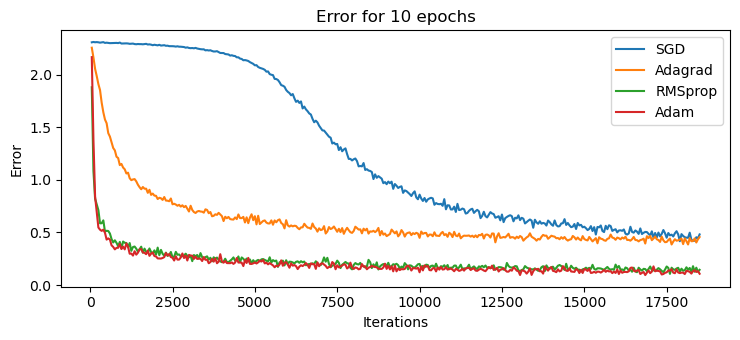

In [25]:
# Plot the results with matplotlib and show the difference in convergence speed with different optimizers.
# Plot the decreasing loss of each model with each optimizer

# Your code here
import matplotlib.pyplot as plt


for row in range(2):
   
    for col in range(2): 
        x= [x*50 for x in range(1,len(list(optimErr.values())[(row * 2) + col])+1)]
        
        plt.plot(x, list(optimErr.values())[(row * 2) + col], label=list(optimErr.keys())[(row * 2) + col])
plt.title('Error for 10 epochs')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.legend()
plt.show()
